# Visualizando os dados iniciais

In [67]:
import pandas as pd

df_solar = pd.read_csv('PotAC_2017-2020.csv', sep=';')
df_solar['Date'] = pd.to_datetime(df_solar['Date'], unit='s')
df_solar['Value'] = df_solar['Value'].replace({',': ''}, regex=True)
df_solar['Value'] = pd.to_numeric(df_solar['Value'], downcast="float")
df_solar = df_solar.set_index('Date')
hourly_data_solar = df_solar.resample('H').sum()
hourly_data_solar['Value'] = hourly_data_solar['Value']
hourly_data_solar = hourly_data_solar.truncate('2019-08-24','2020-06-09')
hourly_data_solar

,Value
Date,
2019-08-24 00:00:00,0.0
2019-08-24 01:00:00,0.0
2019-08-24 02:00:00,0.0
2019-08-24 03:00:00,0.0
2019-08-24 04:00:00,0.0
...,...
2020-06-05 17:00:00,13538.0
2020-06-05 18:00:00,5963.0
2020-06-05 19:00:00,3787.0


Os dados originais são medidos em **Watts** com um intervalo de tempo de 5 minutos, aqui eu apenas reagrupei em um intervalo de tempo de horas somando todos os dados que estão dentro da mesma hora portanto a unidade final é **Wh**.

In [68]:
df_pk = pd.read_csv('P0_PK_24_08_19-09_06_20.csv')
df_pk['Date'] = pd.to_datetime(df_pk['Date'], dayfirst=True)
df_pk = df_pk[df_pk['Value']>=0]
df_pk = df_pk.set_index('Date')
df_pk

,Value
Date,
2019-08-24 03:00:00,4140.98
2019-08-24 04:00:00,4461.03
2019-08-24 05:00:00,4206.58
2019-08-24 06:00:00,4536.23
2019-08-24 07:00:00,4438.93
...,...
2020-06-09 00:00:00,2465.89
2020-06-09 01:00:00,2514.46
2020-06-09 02:00:00,2742.18


In [69]:
df_pl = pd.read_csv('P0_PL_24_08_19-09_06_20.csv')
df_pl['Date'] = pd.to_datetime(df_pl['Date'], dayfirst=True)
df_pl = df_pl[df_pl['Value']>=0]
df_pl = df_pl.set_index('Date')
df_pl

,Value
Date,
2019-08-23 22:00:00,137.18
2019-08-23 23:00:00,144.95
2019-08-24 00:00:00,106.54
2019-08-24 01:00:00,100.41
2019-08-24 02:00:00,81.25
...,...
2020-06-08 00:00:00,2267.18
2020-06-08 01:00:00,2315.47
2020-06-08 02:00:00,2322.17


O conjunto de dados dos prédios PK e PL foram obtidos pelo Canopus, usei o feed *P0*  de cada prédio e peguei os dados com um intervalo de 1hr.

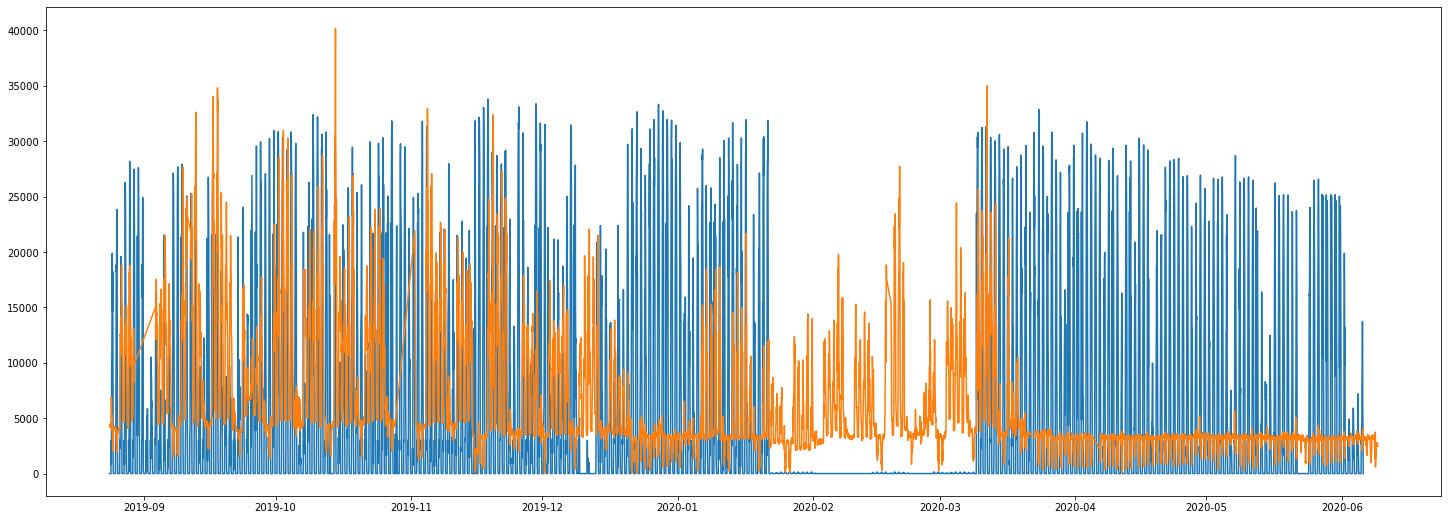

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,9))
plt.plot(hourly_data_solar)
plt.plot(df_pk)

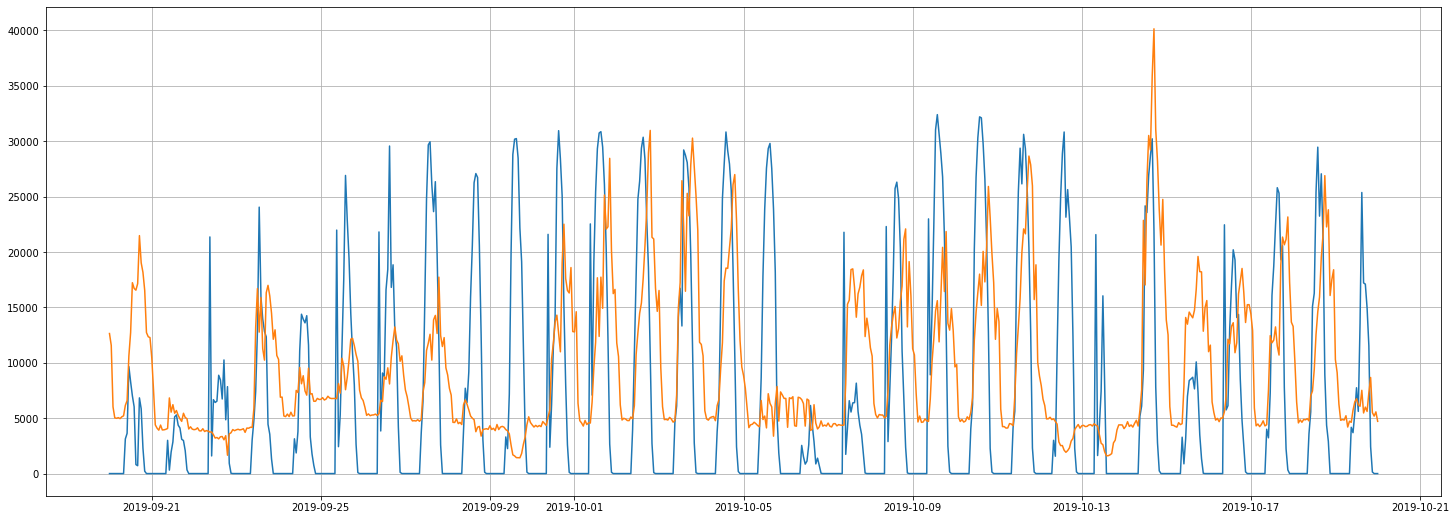

In [71]:
hourly_data_solar2 = hourly_data_solar.truncate('2019-09-20','2019-10-20')
df_pk2 = df_pk.truncate('2019-09-20','2019-10-20')
plt.figure(figsize=(25,9))
plt.plot(hourly_data_solar2)
plt.plot(df_pk2)
plt.grid()

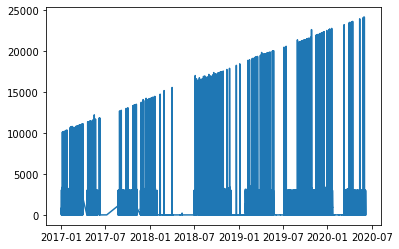

In [72]:
plt.plot(df_solar)

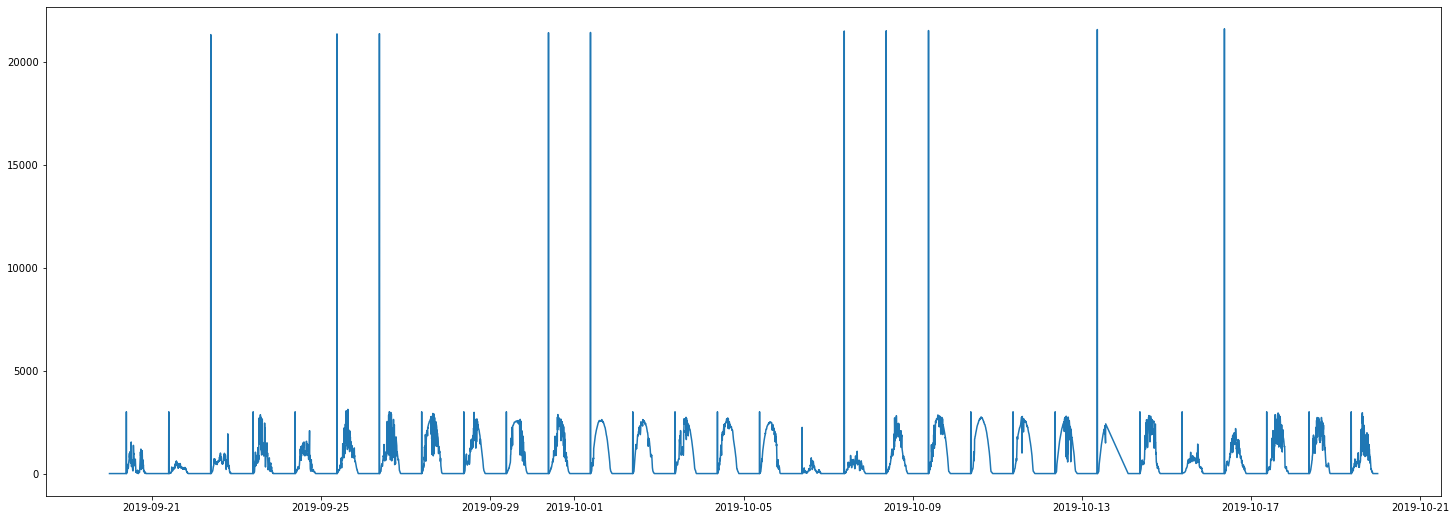

In [73]:
plt.figure(figsize=(25,9))
plt.plot(df_solar.truncate('2019-09-20','2019-10-20'))

No último gráfico é preceptível que existem vários pontos que estão altos demais (em torno de 20k) descaracterizando o conjunto de dados, é necessário limpar esses valores que estão muito altos.

# Limpeza de dados

In [85]:
df_solar = df_solar[df_solar['Value']<8000]
df_solar.describe()

,Value
count,321883.000000
mean,365.633484
std,696.667969
min,0.000000
25%,0.000000
50%,0.000000
75%,378.000000
max,3521.000000


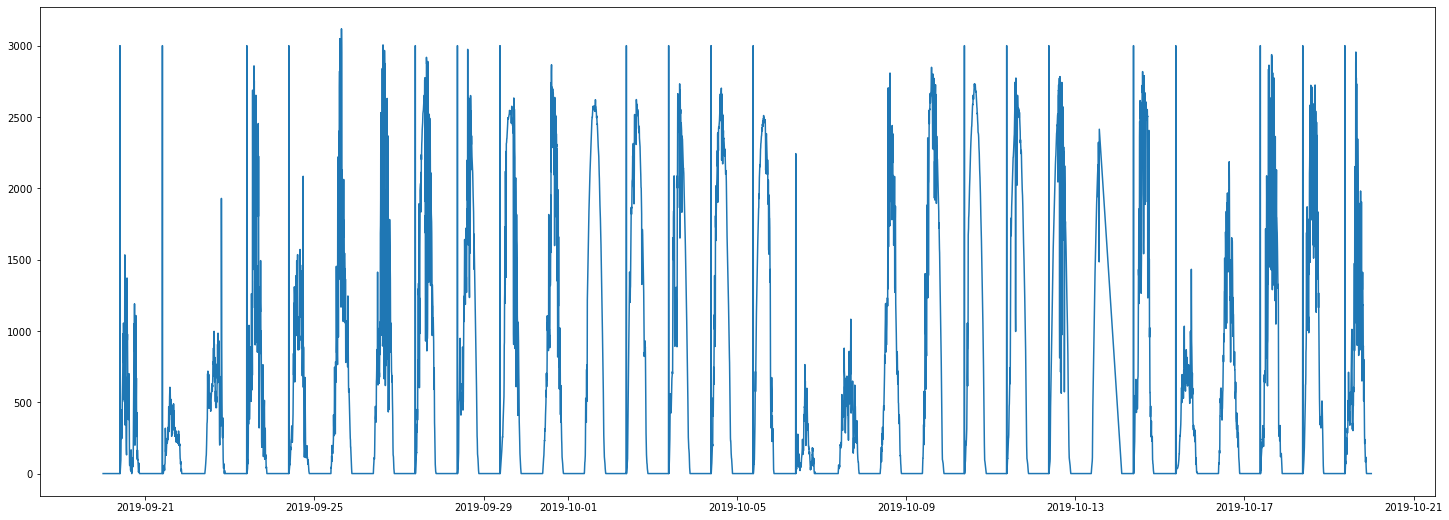

In [75]:
plt.figure(figsize=(25,9))
plt.plot(df_solar.truncate('2019-09-20','2019-10-20'))

Agora os valores parecem fazer mais sentido.

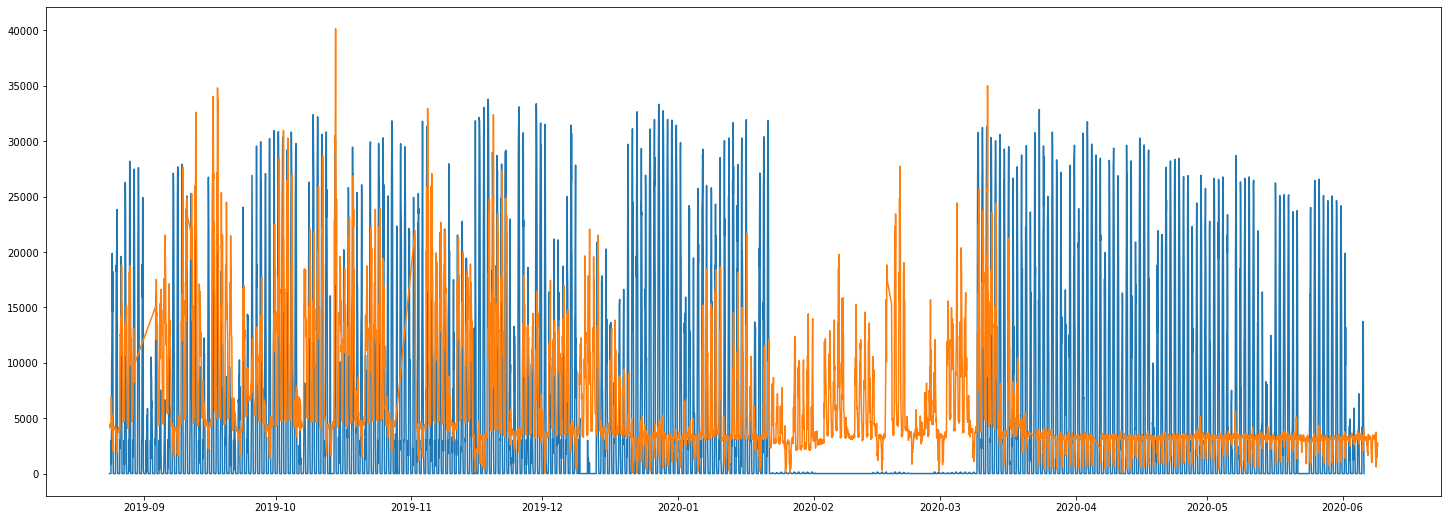

In [76]:
hourly_data_solar = df_solar.resample('H').sum()
hourly_data_solar['Value'] = hourly_data_solar['Value']
hourly_data_solar = hourly_data_solar.truncate('2019-08-24','2020-06-09')
df_pk = df_pk.truncate('2019-08-24','2020-06-09')
plt.figure(figsize=(25,9))
plt.plot(hourly_data_solar)
plt.plot(df_pk)

In [77]:
hourly_data_solar.truncate('2019-09-01','2019-11-01').describe()

,Value
count,1465.000000
mean,6090.066895
std,9101.981445
min,0.000000
25%,0.000000
50%,140.000000
75%,9221.000000
max,32397.000000


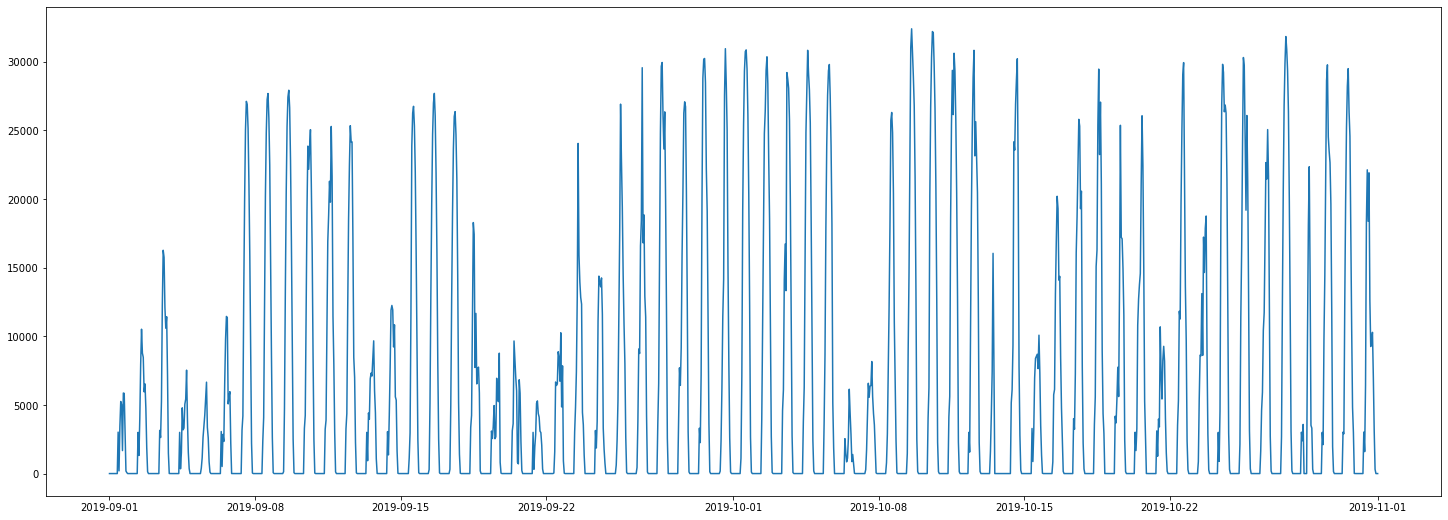

In [78]:
plt.figure(figsize=(25,9))
plt.plot(hourly_data_solar.truncate('2019-09-01','2019-11-01'))

# Gráficos  {kWh PK - kWh Solar}

## Gráfico de todo o período

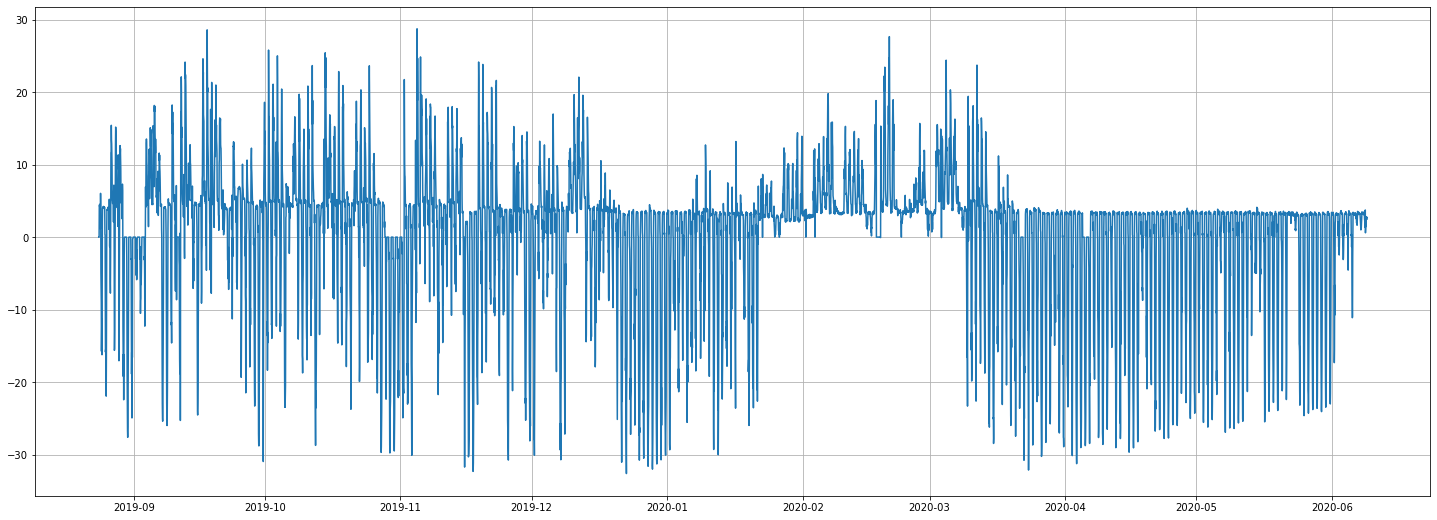

In [79]:
plt.figure(figsize=(25,9))
df_solar_pk = df_pk.sub(hourly_data_solar, fill_value = 0)
plt.plot(df_solar_pk/1000)
plt.grid()

## Gráfico Setembro-Outrubro 2019

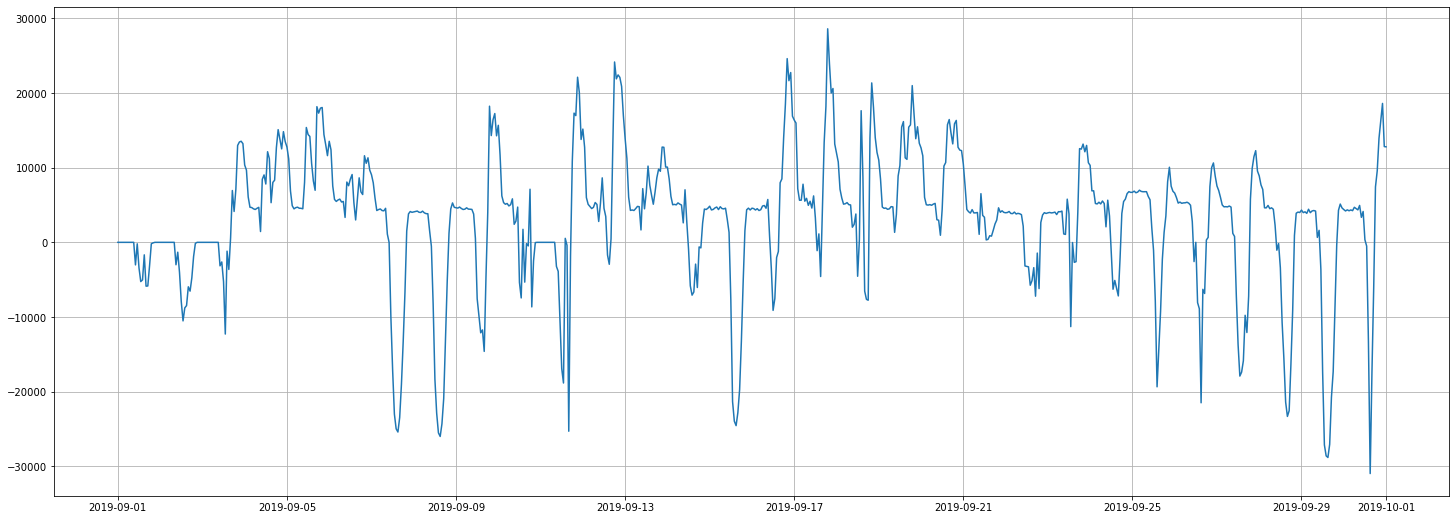

In [80]:
plt.figure(figsize=(25,9))
plt.plot(df_solar_pk.truncate('2019-09-01','2019-10-01'))
plt.grid()

## Gráfico 1 semana

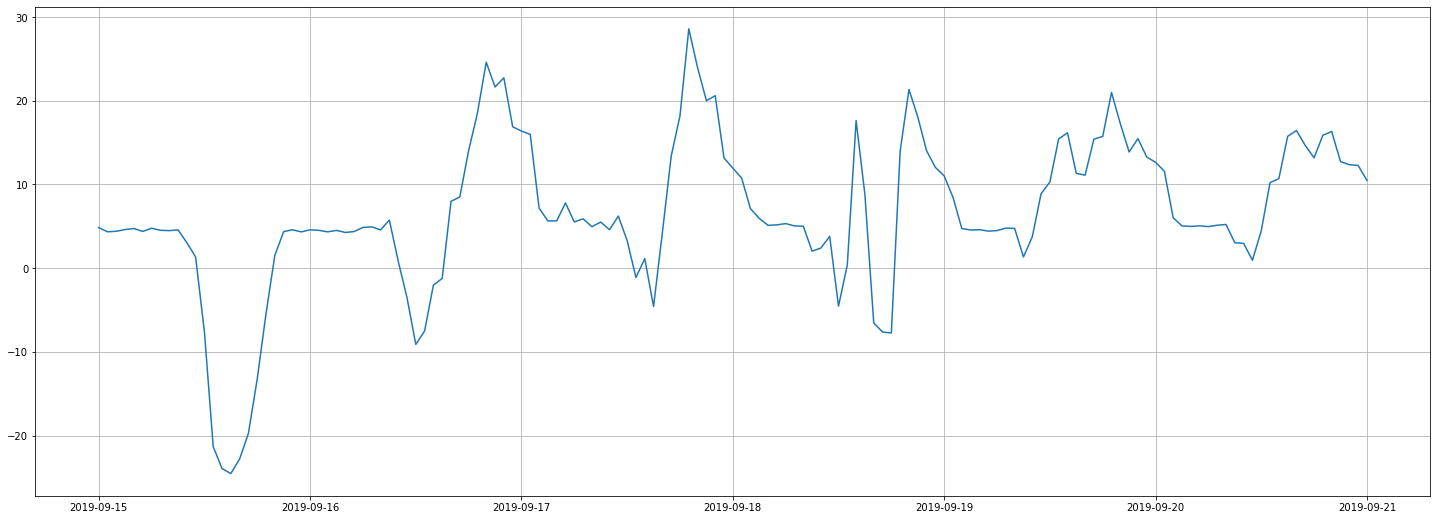

In [81]:
plt.figure(figsize=(25,9))
plt.plot(df_solar_pk.truncate('2019-09-15','2019-09-21')/1000)
plt.grid()

# Gráficos  {kWh (PK+PL) - kWh Solar}

## Gráfico de todo o período

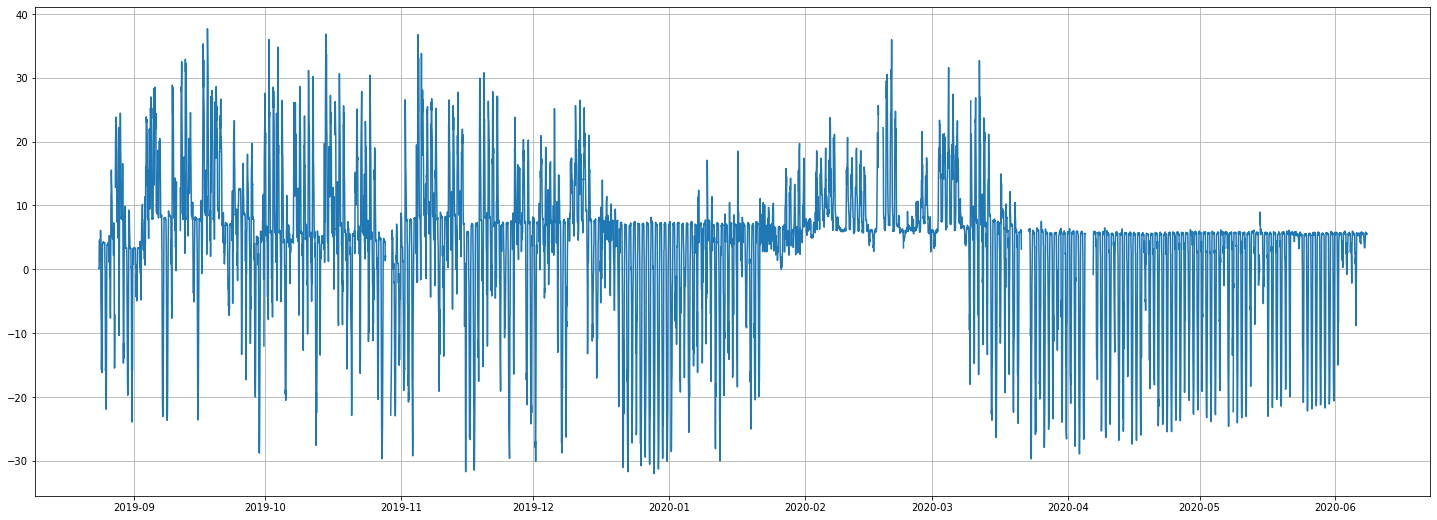

In [82]:
plt.figure(figsize=(25,9))
df_solar_pk_pl = df_solar_pk.add(df_pl)
plt.plot(df_solar_pk_pl/1000)
plt.grid()

## Gráfico Setembro-Outrubro 2019

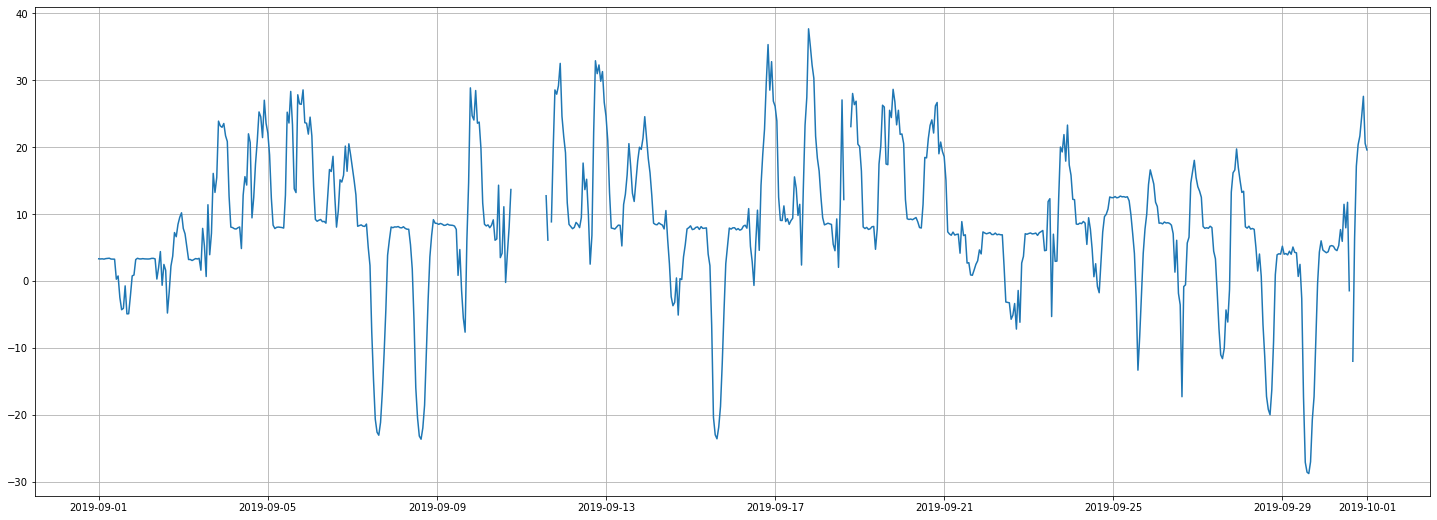

In [83]:
plt.figure(figsize=(25,9))
plt.plot(df_solar_pk_pl.truncate('2019-09-01','2019-10-01')/1000)
plt.grid()

## Gráfico 1 semana

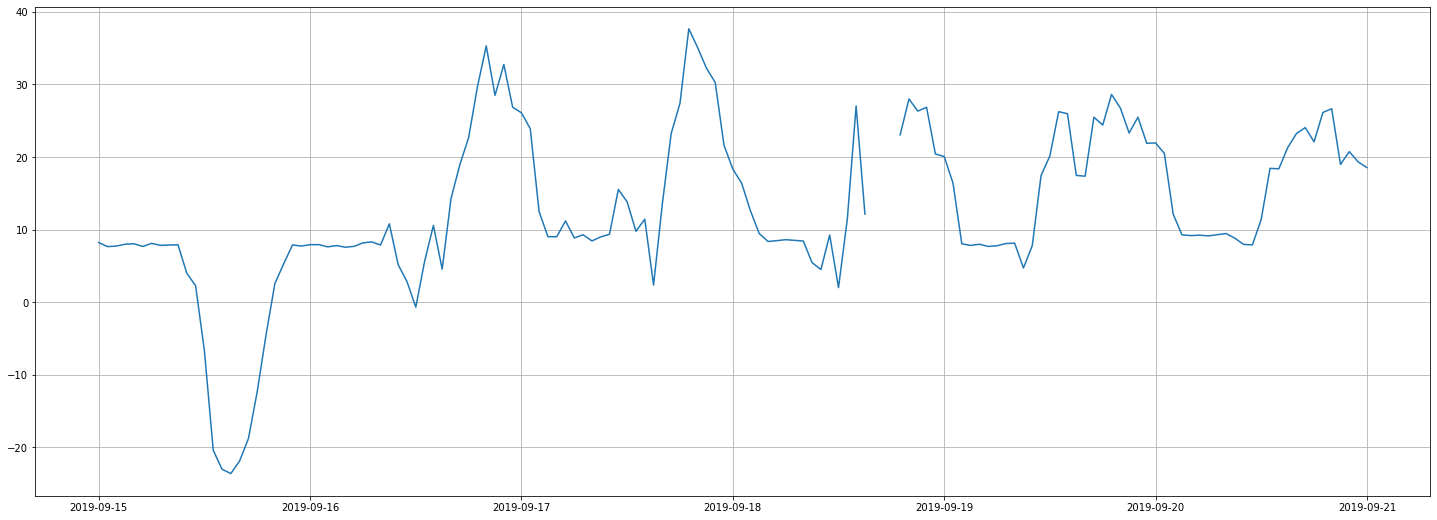

In [84]:
plt.figure(figsize=(25,9))
plt.plot(df_solar_pk_pl.truncate('2019-09-15','2019-09-21')/1000)
plt.grid()